In [8]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset paths
dataset_path = r"C:\\Users\\samik\\Desktop\\Rain3"
output_path = r"C:\\Users\\samik\\Desktop\\Rain3"

# Create required folders
for folder in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_path, folder), exist_ok=True)

# Define class names
classes = ["Guava_Diseased", "Guava_Healthy", "Jamun_Diseased", "Jamun_Healthy", "Pomegranate_Diseased", "Pomegranate_Healthy"]

# Split dataset
all_data = []
for label in classes:
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for image_name in os.listdir(label_path):
            if image_name.endswith(('.jpg', '.png', '.jpeg')):
                all_data.append((os.path.join(label_path, image_name), label))

random.shuffle(all_data)

train_ratio, val_ratio = 0.7, 0.2
train_split = int(len(all_data) * train_ratio)
val_split = int(len(all_data) * (train_ratio + val_ratio))

train_data = all_data[:train_split]
val_data = all_data[train_split:val_split]
test_data = all_data[val_split:]

def copy_data(data_list, folder):
    for image_path, label in data_list:
        class_folder = os.path.join(output_path, folder, label)
        os.makedirs(class_folder, exist_ok=True)
        shutil.copy(image_path, os.path.join(class_folder, os.path.basename(image_path)))

copy_data(train_data, "train")
copy_data(val_data, "val")
copy_data(test_data, "test")

# Load dataset
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, zoom_range=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(output_path, "train"),
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(output_path, "val"),
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Build CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save the trained model
model.save(os.path.join(output_path, "leaf_disease_cnn.h5"))



Found 612 images belonging to 6 classes.
Found 612 images belonging to 6 classes.


c:\Users\samik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\samik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 258s 10s/step - accuracy: 0.2354 - loss: 1.7277 - val_accuracy: 0.4085 - val_loss: 1.2473
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 214s 9s/step - accuracy: 0.4365 - loss: 1.1703 - val_accuracy: 0.6209 - val_loss: 0.8269
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 320s 15s/step - accuracy: 0.6593 - loss: 0.8415 - val_accuracy: 0.7092 - val_loss: 0.7561
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 211s 9s/step - accuracy: 0.6139 - loss: 0.9547 - val_accuracy: 0.6225 - val_loss: 0.8189
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 206s 9s/step - accuracy: 0.6358 - loss: 0.8192 - val_accuracy: 0.7761 - val_loss: 0.5762
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 537s 26s/step - accuracy: 0.7550 - loss: 0.6555 - val_accuracy: 0.7941 - val_loss: 0.5904
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 209s 8s/step - accuracy: 0.7641 - loss: 0.5947 - val_accuracy: 0.7108 - val_loss: 0.6240
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 194s 8s/step - accuracy: 0.7812 - loss: 0.5392 - val_accuracy: 0.8758 - val_loss:

In [39]:
# Prediction function
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img = tf.expand_dims(img, axis=0)
    
    predictions = model.predict(img)
    class_idx = tf.argmax(predictions, axis=1).numpy()[0]
    class_labels = {0: "Guava Diseased", 1: "Guava Healthy", 2: "Jamun Diseased", 3: "Jamun Healthy", 4: "Pomegranate Diseased", 5: "Pomegranate Healthy"}
    
    return class_labels[class_idx], float(predictions[0][class_idx])

# Example usage
image_path = "C:\\Users\\samik\\Desktop\\Rain3\\test\\pomegranate_diseased\\0020_0212.JPG"
predicted_class, confidence = predict_image(image_path)
print(f"Predicted Class: {predicted_class} with confidence: {confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 534ms/step
Predicted Class: Pomegranate Diseased with confidence: 0.95


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image size and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Define dataset path
train_data_dir = "C:\\Users\\samik\\Desktop\\Rain3\\train2"
val_data_dir = "C:\\Users\\samik\\Desktop\\Rain3\\val2"

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 612 images belonging to 3 classes.
Found 612 images belonging to 3 classes.


In [11]:
# Create a CNN model
leaf_type_model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(3, activation="softmax")  # 3 classes: Guava, Jamun, Pomegranate
])

# Compile the model
leaf_type_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
leaf_type_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save the trained model
leaf_type_model.save("C:\\Users\\samik\\Desktop\\Rain3\\leaf_type_cnn.h5")


c:\Users\samik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 238s 10s/step - accuracy: 0.5259 - loss: 1.2242 - val_accuracy: 0.8105 - val_loss: 0.5164
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 383s 18s/step - accuracy: 0.8057 - loss: 0.4949 - val_accuracy: 0.8235 - val_loss: 0.3970
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 381s 17s/step - accuracy: 0.8091 - loss: 0.4216 - val_accuracy: 0.8709 - val_loss: 0.3403
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 261s 8s/step - accuracy: 0.8577 - loss: 0.3485 - val_accuracy: 0.9003 - val_loss: 0.2215
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 307s 14s/step - accuracy: 0.8940 - loss: 0.2657 - val_accuracy: 0.9592 - val_loss: 0.1533
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 190s 8s/step - accuracy: 0.9117 - loss: 0.2088 - val_accuracy: 0.9444 - val_loss: 0.1242
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 181s 8s/step - accuracy: 0.9012 - loss: 0.1996 - val_accuracy: 0.9542 - val_loss: 0.1273
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 184s 8s/step - accuracy: 0.9535 - loss: 0.1332 - val_accuracy: 0.9869

In [23]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load the trained leaf type model
leaf_type_model = load_model("C:\\Users\\samik\\Desktop\\Rain3\\leaf_type_cnn.h5")

# Define class labels
leaf_classes = ["Guava", "Jamun", "Pomegranate"]

def predict_leaf_type(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    predictions = leaf_type_model.predict(img)
    class_idx = np.argmax(predictions)

    return leaf_classes[class_idx]

print(predict_leaf_type("C:\\Users\\samik\\Desktop\\Rain3\\test\\pomegranate_diseased\\0020_0221.JPG"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Pomegranate


In [29]:
import cv2
import numpy as np
import tensorflow as tf  # Assuming TensorFlow is used

# Load the trained model
disease_model = tf.keras.models.load_model("C:\\Users\\samik\\Desktop\\Rain3\\leaf_type_cnn.h5")

# Define class labels
disease_classes = ["Healthy", "Diseased"]  # Adjust as per your dataset

def predict_leaf(image_path, leaf_name="Guava Leaf"):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Unable to read the image.")
        return "Invalid Image"

    img = cv2.resize(img, (128, 128))  # Resize image
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict leaf type (Healthy/Diseased)
    disease_pred = disease_model.predict(img)

    print(f"Model Output: {disease_pred}")  # Debugging Line
    print(f"Output Shape: {disease_pred.shape}")  # Debugging Line

    disease_idx = np.argmax(disease_pred)

    print(f"Predicted Index: {disease_idx}")  # Debugging Line

    if disease_idx >= len(disease_classes):
        print("Error: Index out of range!")
        return "Prediction Error"

    disease_status = disease_classes[disease_idx]

    return f"{leaf_name} - {disease_status}"

# Run the function
print(predict_leaf("C:\\Users\\samik\\Desktop\\Rain3\\test\\Gauva_diseased\\0015_0091.JPG"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Model Output: [[0.00572304 0.003907   0.99037   ]]
Output Shape: (1, 3)
Predicted Index: 2
Error: Index out of range!
Prediction Error


In [31]:
disease_classes = ["Healthy", "Diseased"]
print("Disease Classes:", disease_classes)
print("Expected Class Count:", len(disease_classes))


Disease Classes: ['Healthy', 'Diseased']
Expected Class Count: 2


In [33]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    
    if img is None:
        print(f"Error: Could not load image from {image_path}")
        return "Invalid Image Path"

    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    predictions = model.predict(img)
    class_idx = np.argmax(predictions)
    class_labels = ["Guava_Diseased", "Guava_Healthy", "Jamun_Diseased", "Jamun_Healthy", "Pomegranate_Diseased", "Pomegranate_Healthy"]
    return class_labels[class_idx]

print(predict_image("C:\\Users\\samik\\Desktop\\Rain3\\test\\Jamun_diseased\\0017_0137.JPG"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Jamun_Healthy


In [38]:
import tensorflow as tf
import numpy as np
import cv2
import os

# Load model function
def load_model(model_path):
    return tf.keras.models.load_model(model_path)

# Preprocess image dynamically based on model input shape
def preprocess_image(image_path, model):
    expected_shape = model.input_shape[1:3]  # Extract expected height and width
    image = cv2.imread(image_path)
    image = cv2.resize(image, expected_shape)  # Resize to match model input
    image = image / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Function to dynamically generate class labels based on the model
def get_class_labels(model):
    num_classes = model.output_shape[1]  # Get number of output classes
    return [f"Class {i}" for i in range(num_classes)]

# Predict disease status
def predict_disease(model, image_path, class_labels):
    image = preprocess_image(image_path, model)
    prediction = model.predict(image)

    # Debug: Print raw prediction output
    print("Raw model prediction output:", prediction)

    predicted_index = np.argmax(prediction)  # Get the index of the highest probability

    # Validate index before accessing class_labels
    if predicted_index >= len(class_labels):
        print(f"Error: Predicted index {predicted_index} is out of range!")
        return "Unknown Class"

    predicted_class = class_labels[predicted_index]  # Map index to class name
    return predicted_class

# Main function to predict
def main():
    leaf_type_model_path = 'leaf_type_cnn.h5'
    disease_model_path = 'leaf_disease_cnn.h5'
    
    leaf_type_model = load_model(leaf_type_model_path)
    disease_model = load_model(disease_model_path)

    # Generate dynamic class labels for the disease model
    disease_class_labels = get_class_labels(disease_model)

    # Take user input for leaf type
    leaf_type = input("Enter the type of leaf (Guava, Jamun, Pomegranate): ")
    valid_types = ['Guava', 'Jamun', 'Pomegranate']
    if leaf_type not in valid_types:
        print("Invalid leaf type! Please enter a valid option.")
        return
    
    image_path = input("Enter the path of the leaf image: ")
    
    if not os.path.exists(image_path):
        print("Invalid file path!")
        return
    
    disease_status = predict_disease(disease_model, image_path, disease_class_labels)
    print(f"Health Status of {leaf_type} Leaf: {disease_status}")

# Run the main function
if __name__ == "__main__":
    main()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Raw model prediction output: [[3.8111201e-03 9.2912223e-06 3.0105688e-05 1.4510970e-02 1.1006585e-08
  9.8163855e-01]]
Health Status of Jamun Leaf: Class 5


In [1]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have true labels (y_true) and predicted labels (y_pred)
# And probability scores for the positive class (y_proba)

def evaluate_model(y_true, y_pred, y_proba):
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    # Precision & Recall
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
    return precision, recall, roc_auc


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,416 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Found 612 images belonging to 6 classes.

📊 Dataset Distribution:
Gauva_diseased: 70 images
Gauva_healthy: 119 images
Jamun_diseased: 119 images
Jamun_healthy: 126 images
pomegranate_diseased: 68 images
pomegranate_healthy: 110 images


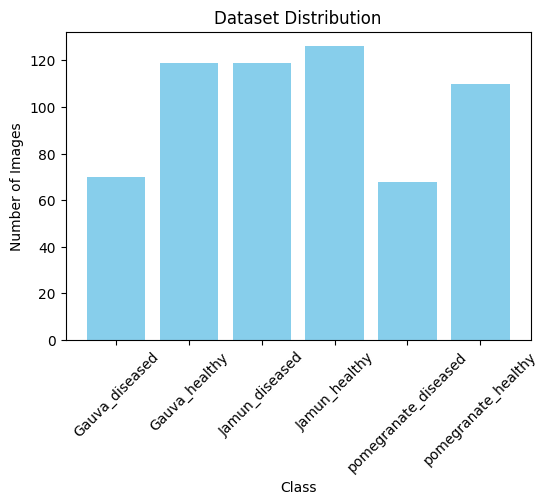

c:\Users\samik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 123s 6s/step - accuracy: 0.7954 - loss: 0.5507

✅ Validation Accuracy: 0.8219
❌ Validation Loss: 0.4572


In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, roc_curve, auc

# Load the trained CNN model
model_path = "C:\\Users\\samik\\Desktop\\Rain3\\leaf_disease_cnn.h5"
model = tf.keras.models.load_model(model_path)

# Print model architecture (CNN layers)
model.summary()

# Load validation dataset
val_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\samik\\Desktop\\Rain3\\val",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Dataset distribution
class_counts = dict(zip(val_generator.class_indices.keys(), np.bincount(val_generator.classes)))
print("\n📊 Dataset Distribution:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

# Plot dataset distribution
plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Dataset Distribution")
plt.xticks(rotation=45)
plt.savefig("dataset_distribution.png")
plt.show()

# Evaluate model to get loss and accuracy
loss, accuracy = model.evaluate(val_generator, verbose=1)
print(f"\n✅ Validation Accuracy: {accuracy:.4f}")
print(f"❌ Validation Loss: {loss:.4f}")



Found 612 images belonging to 6 classes.


c:\Users\samik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.7954 - loss: 0.5507
Validation Accuracy: 0.82
Validation Loss: 0.46
20/20 ━━━━━━━━━━━━━━━━━━━━ 95s 5s/step


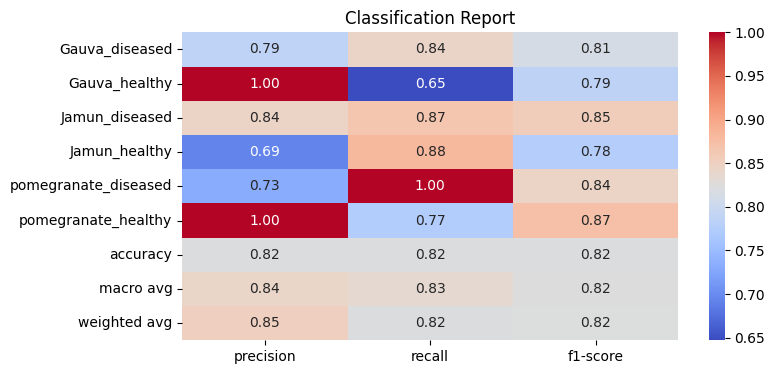

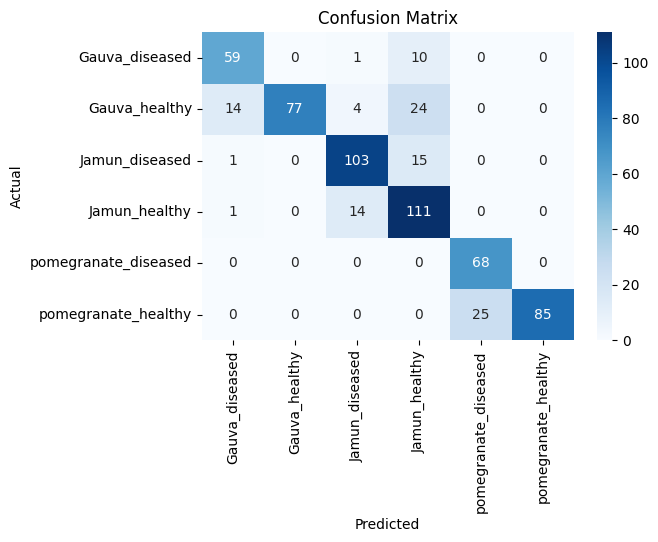

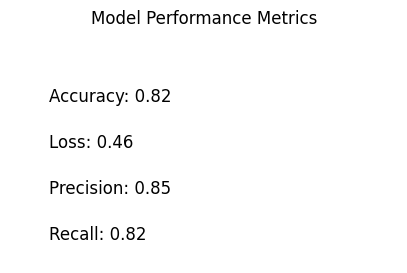

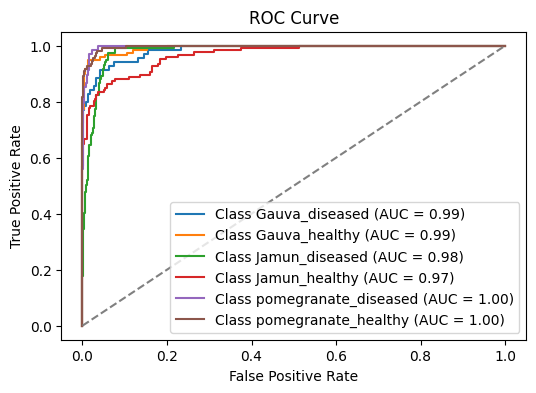

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, roc_curve, auc

# Load the trained model
model_path = "C:\\Users\\samik\\Desktop\\Rain3\\leaf_disease_cnn.h5"
model = tf.keras.models.load_model(model_path)

# Load validation dataset
val_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\samik\\Desktop\\Rain3\\val",
    target_size=(128, 128),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Get true labels and predictions
y_true = val_generator.classes
y_proba = model.predict(val_generator)
y_pred = np.argmax(y_proba, axis=1)

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Generate Classification Report and Save as Image
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)

plt.figure(figsize=(8, 4))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Classification Report")
plt.savefig("classification_report.png")  # Save as image
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")  # Save as image
plt.show()

# Precision & Recall as an Image
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")

plt.figure(figsize=(4, 2))
plt.text(0.1, 0.6, f"Precision: {precision:.2f}", fontsize=12)
plt.text(0.1, 0.3, f"Recall: {recall:.2f}", fontsize=12)
plt.axis("off")
plt.title("Precision & Recall")
plt.savefig("precision_recall.png")  # Save as image
plt.show()

# ROC Curve for multi-class
plt.figure(figsize=(6, 4))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_true == i, y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("roc_curve.png")  # Save as image
plt.show()
